# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
#Librerias Necesarias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Importando datos
data_2020 = pd.read_csv('flujo-vehicular-2020 (1).csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
#Valores del campo estación
#print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
#Valores del campo sentido
#print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2016['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
#Valores del campo tipo de vehiculo
#print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
#Valores del campo forma de pago
#print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset0 = pd.concat([data_2019, data_2018, data_2017])
print(dataset0)
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset0.estacion=='Illia', dataset0.forma_pago == 'EFECTIVO')
dataset = dataset0[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

         periodo       fecha  hora_inicio  hora_fin      dia    estacion  \
0           2019  2019-01-01            0         1   Martes     Alberti   
1           2019  2019-01-01            0         1   Martes     Alberti   
2           2019  2019-01-01            0         1   Martes     Alberti   
3           2019  2019-01-01            0         1   Martes     Alberti   
4           2019  2019-01-01            0         1   Martes  Avellaneda   
...          ...         ...          ...       ...      ...         ...   
1372640     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372641     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372642     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372643     2017  2017-12-31           23         0  Domingo   Sarmiento   
1372644     2017  2017-12-31           23         0  Domingo   Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0           Centro      

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
dataset.describe()

,hora_fin,cantidad_pasos
count,238869.000000,238869.000000
mean,11.874659,200.384232
std,6.739129,403.246904
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,11.000000
75%,18.000000,104.000000
max,23.000000,2416.000000


In [13]:
dtset=dataset.copy()

In [14]:
dtset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [15]:
dia_semana = dtset.groupby(by="dia")["cantidad_pasos"].count().sort_values(ascending=False)
dia_semana

dia
Viernes      35196
Miércoles    35005
Jueves       34914
Martes       34335
Lunes        34144
Sábado       33351
Domingo      31924
Name: cantidad_pasos, dtype: int64

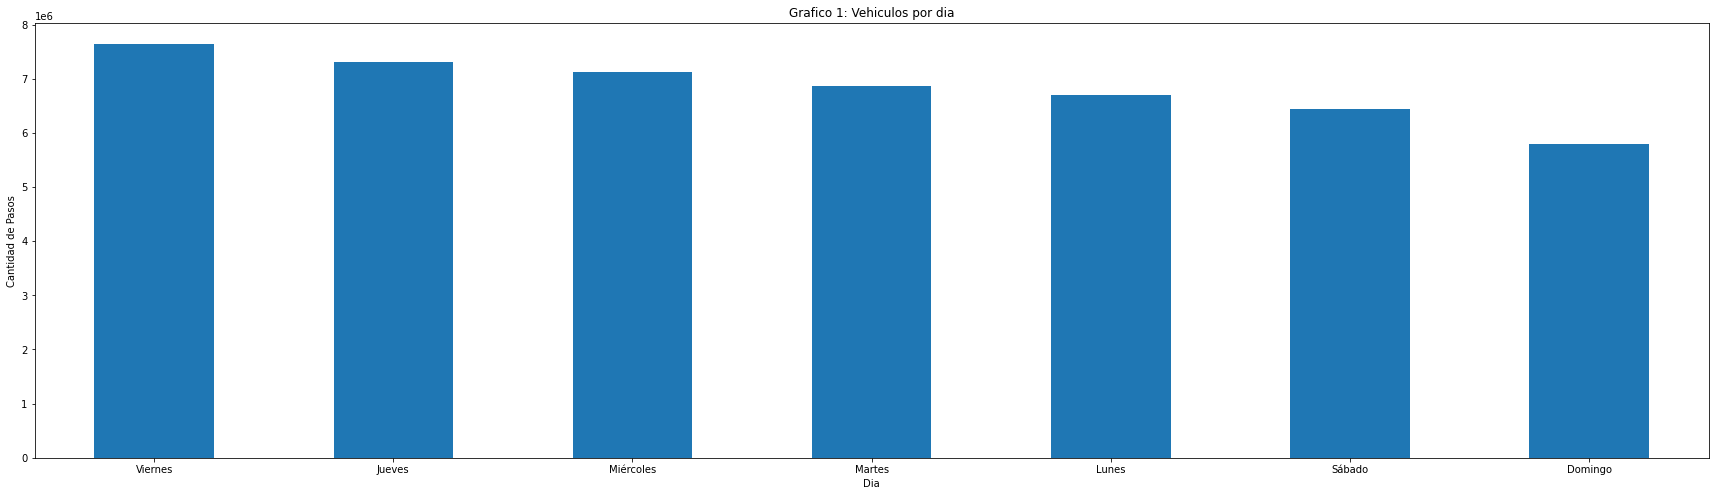

In [16]:
#Gráfico #1 Cantidad de Vehiculos por dia 
plt.figure(figsize = (30,8))
dtset.groupby(by="dia")["cantidad_pasos"].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel('Dia')
plt.ylabel('Cantidad de Pasos')
plt.title('Grafico 1: Vehiculos por dia')
plt.show()

En el grafico 1, se puede observar la cantidad de vehiculos que pasaron para cada dia de la semana. Como conclusion los dias viernes pasaron mas vehiculos. 

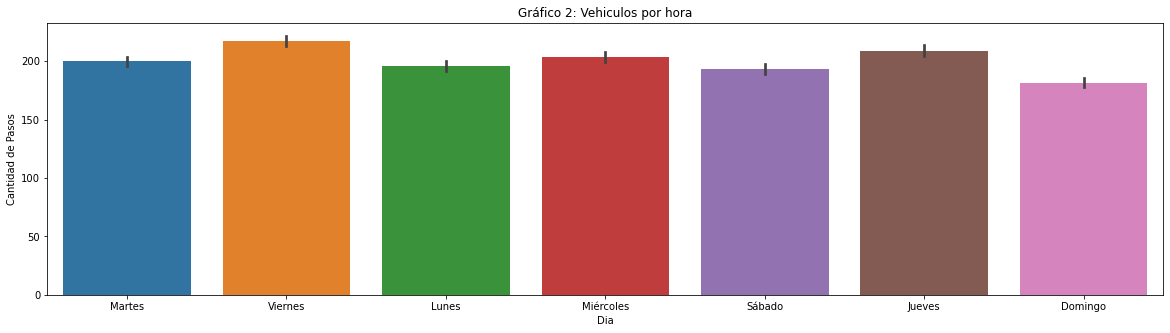

In [17]:
#Gráfico #2 Cantidad de vehiculos por hora
plt.figure(figsize = (20,5))
sns.barplot(x="dia", y="cantidad_pasos", data=dtset)
plt.xlabel('Dia')
plt.ylabel('Cantidad de Pasos')
plt.title('Gráfico 2: Vehiculos por hora')
plt.show()

In [18]:
hora_semana = dtset.groupby(by="dia")["cantidad_pasos"].mean().sort_values(ascending=False)
hora_semana

dia
Viernes      217.276736
Jueves       209.147305
Miércoles    203.557378
Martes       199.957798
Lunes        195.975486
Sábado       193.149081
Domingo      181.429677
Name: cantidad_pasos, dtype: float64

En el grafico #2 podemos observar el promedio de vehiculos que pasa por hora y cada dia de la semana, donde los dias viernes es el dia que mayor trafico se tiene por hora

Text(0.5, 1.0, 'Grafico 3: Horario de mayor trafico')

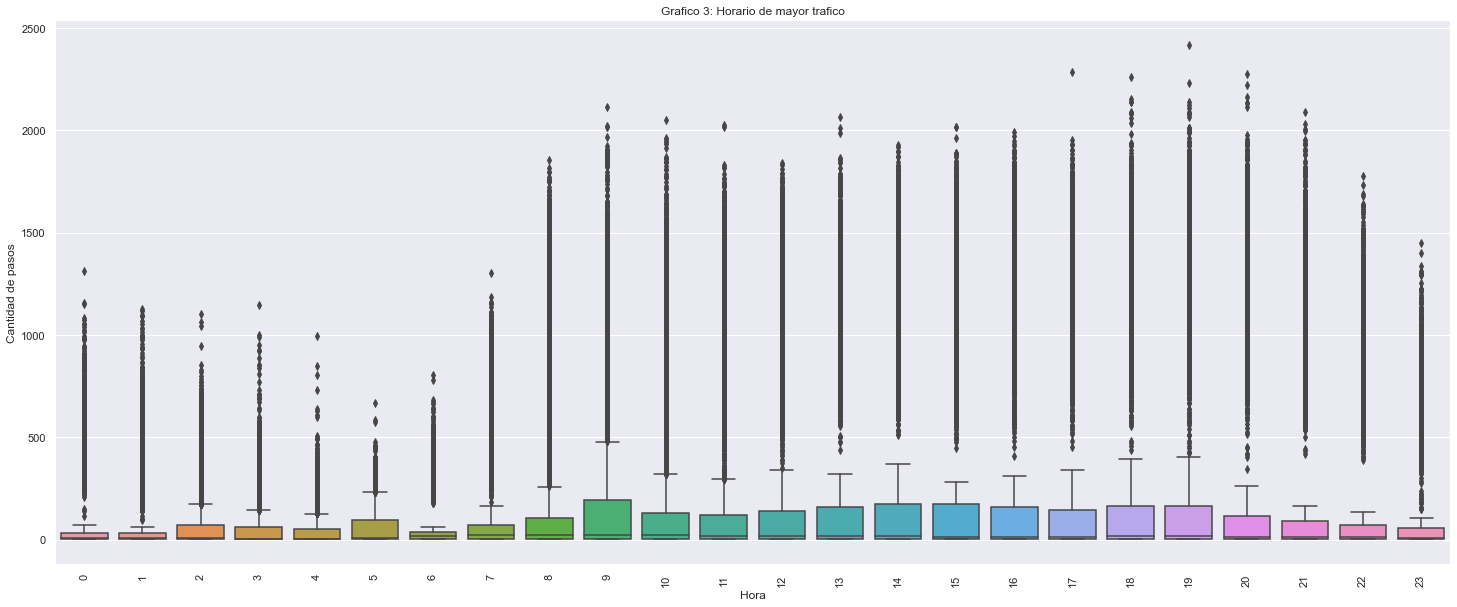

In [19]:
#Grafico 3: Horarios de mayor trafico
sns.set(context='notebook')
plt.figure(figsize=(25,10))
sns.boxplot(data=dtset,x="hora_fin",y="cantidad_pasos")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.xlabel('Hora')
plt.ylabel('Cantidad de pasos')
plt.title('Grafico 3: Horario de mayor trafico')

In [20]:
hpico_semana = dtset.groupby(by="hora_fin")["cantidad_pasos"].mean().sort_values(ascending=False)
hpico_semana

hora_fin
18    292.162446
19    291.271219
14    277.472120
17    275.487347
15    270.507931
16    270.108059
13    266.592409
20    259.013817
12    248.350227
9     240.316418
11    235.385680
21    234.840325
10    234.804788
8     221.582036
22    194.626479
7     155.252432
23    148.907452
0     114.199093
1      98.943838
6      86.290241
2      71.034905
3      51.664223
5      48.822552
4      40.628488
Name: cantidad_pasos, dtype: float64

Del grafico 3, se puede concluir que los horarios de mayor trafico son las 18 horas y  las 19 horas

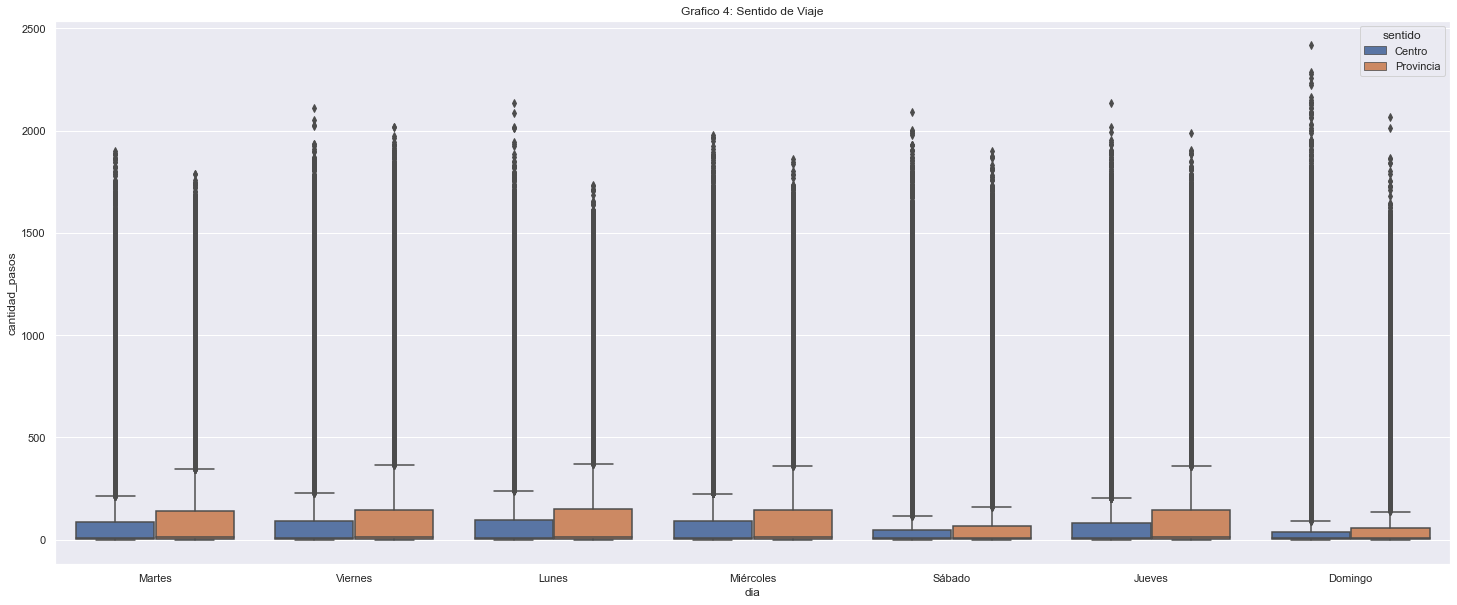

In [21]:
#Grafico 4 Boxplot Sentido en el que circulan los vehiculos
sns.set(context='notebook')
plt.figure(figsize=(25,10))
sns.boxplot(data=dtset,x="dia",y='cantidad_pasos',hue='sentido')
plt.title('Grafico 4: Sentido de Viaje')
plt.show()

Del grafico 4, se puede concluir que los vehiculos circulan con mayor frecuencia en sentido provincia

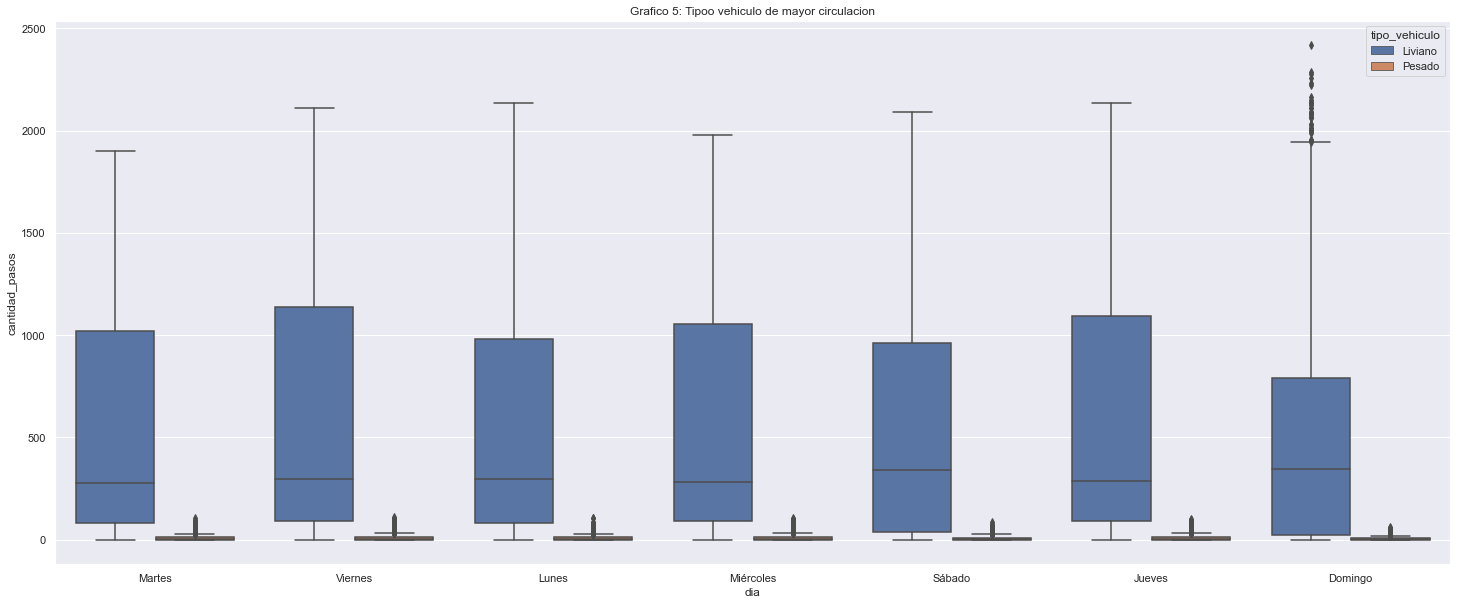

In [22]:
#Gráfico 5 Boxplot Tipo de vehiculo de mayor circulacion 
sns.set(context='notebook')
plt.figure(figsize=(25,10))
sns.boxplot(data=dtset,x="dia",y='cantidad_pasos',hue='tipo_vehiculo')
plt.title('Grafico 5: Tipoo vehiculo de mayor circulacion')
plt.show()

Del grafico 5, se puede concluir que los vehiculos con mayor circulacion son los tipo liviano 

In [23]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.rename(columns = {'fecha':'fecha_original'}, inplace = True) 
dataset.drop(columns=['hora_fin'], inplace = True)

dataset.head()

<ipython-input-23-76ced8f85330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,2019-01-01,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019-01-01,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019-01-01,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019-01-01,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019-01-01,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 80 to 1372326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha_original  238869 non-null  object        
 1   dia             238869 non-null  object        
 2   sentido         238869 non-null  object        
 3   tipo_vehiculo   238869 non-null  object        
 4   cantidad_pasos  238869 non-null  int64         
 5   fecha2          238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 20.8+ MB


In [25]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,2019-01-01,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019-01-01,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019-01-01,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019-01-01,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019-01-01,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [26]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True, ascending=True)
dataset.reset_index(drop=True, inplace = True)
dataset

<ipython-input-26-bb8804ec6789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.sort_values('fecha', inplace = True, ascending=True)


,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,2017-01-01,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,2017-01-01,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,2017-01-01,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,2017-01-01,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,2017-01-01,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...,...
238864,2019-12-31,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,2019-12-31,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,2019-12-31,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,2019-12-31,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [27]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


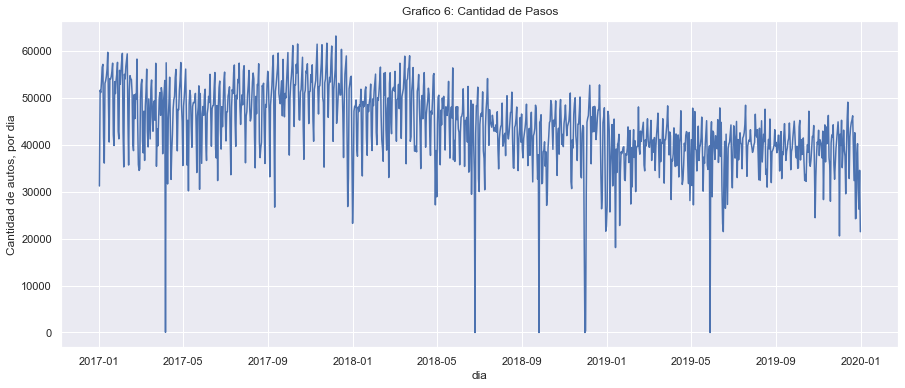

In [28]:
#Gráfico #6
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('dia')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Grafico 6: Cantidad de Pasos')
plt.show()

Del grafico #6 se puede observar que existe dias donde no se tiene informacion, por lo que se procedera a imputar valores para esos dias 

In [29]:
# Hay dias faltantes?
from datetime import timedelta
import datetime as dt
from datetime import datetime

arrDayOfWeek={0:'Domingo', 1:'Lunes', 2:'Martes', 3:'Miercoles', 4:'Jueves', 5:'Viernes', 6:'Sabado'}
def datetime_range(start=None, end=None):
    while start < end:
        ## existe ese dia?
        temp = dataset[(dataset.fecha == start)]
        if temp.empty:
            # No existe este dia, lo agregamos en null
            dds = int(start.strftime("%w"))
            dia_de_la_semana = arrDayOfWeek[dds]
            
            dia_anterior = start - timedelta(days=1)
            s_dia_anterior = dia_anterior.strftime("%Y-%m-%d")
            cantidad_anterior = dataset.cantidad_pasos[(dataset.fecha_original == s_dia_anterior)].sum()
            
            dia_siguiente  = start + timedelta(days=1)
            s_dia_siguiente = dia_siguiente.strftime("%Y-%m-%d")
            cantidad_siguiente = dataset.cantidad_pasos[(dataset.fecha_original == s_dia_siguiente)].sum()
            
            promedio = (cantidad_anterior + cantidad_siguiente) / 2
            fecha_original = start.strftime("%Y-%m-%d")
            
            ## Calcular directamente el promedio de los dias adyacentes
            dataset.loc[dataset.shape[0]] = [fecha_original, dia_de_la_semana, 'Provincia','Liviano', promedio, start] 
            print("Añadido el dia: ", start, promedio)
            
        start = start + timedelta(days=1)
        
datetime_range(start=datetime.strptime('2017-01-01', "%Y-%m-%d"), end=datetime.strptime('2019-12-31', "%Y-%m-%d"))


C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Añadido el dia:  2017-04-06 00:00:00 55537.0
Añadido el dia:  2017-11-04 00:00:00 48845.5
Añadido el dia:  2018-06-25 00:00:00 38312.5
Añadido el dia:  2018-09-25 00:00:00 41299.5
Añadido el dia:  2018-11-10 00:00:00 40806.0
Añadido el dia:  2018-11-29 00:00:00 21862.0
Añadido el dia:  2018-11-30 00:00:00 20970.0
Añadido el dia:  2019-02-11 00:00:00 39980.0
Añadido el dia:  2019-05-29 00:00:00 40353.5
Añadido el dia:  2019-12-24 00:00:00 33440.0


In [30]:
dataset.drop(columns=['fecha_original'], inplace = True)

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
dataset.describe()

,cantidad_pasos
count,238879.000000
mean,201.972492
std,476.599324
min,1.000000
25%,2.000000
50%,11.000000
75%,104.000000
max,55537.000000


In [32]:
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1.0,2017-01-01
1,Domingo,Provincia,Liviano,9.0,2017-01-01
2,Domingo,Provincia,Liviano,644.0,2017-01-01
3,Domingo,Provincia,Pesado,6.0,2017-01-01
4,Domingo,Provincia,Pesado,1.0,2017-01-01


In [33]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-08,347212.0
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0


In [34]:
semanal.tail()

,cantidad_pasos
fecha,
2019-12-08,282891.0
2019-12-15,272960.0
2019-12-22,292881.0
2019-12-29,259830.0
2020-01-05,55970.0


In [35]:
semanal.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-08,347212.0
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0


In [36]:
semanal.reset_index(inplace = True)

In [37]:
#Descartando semanas incompletas
semanal = semanal[(semanal['fecha'] >= "2017-01-09") & (semanal['fecha'] <= "2019-12-29")]

In [38]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
semanal = semanal.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(155, 1)


,cantidad_pasos
fecha,
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0
2017-02-05,359401.0
2017-02-12,363774.0


279304.5 335271.0 55966.5 195354.75 419220.75


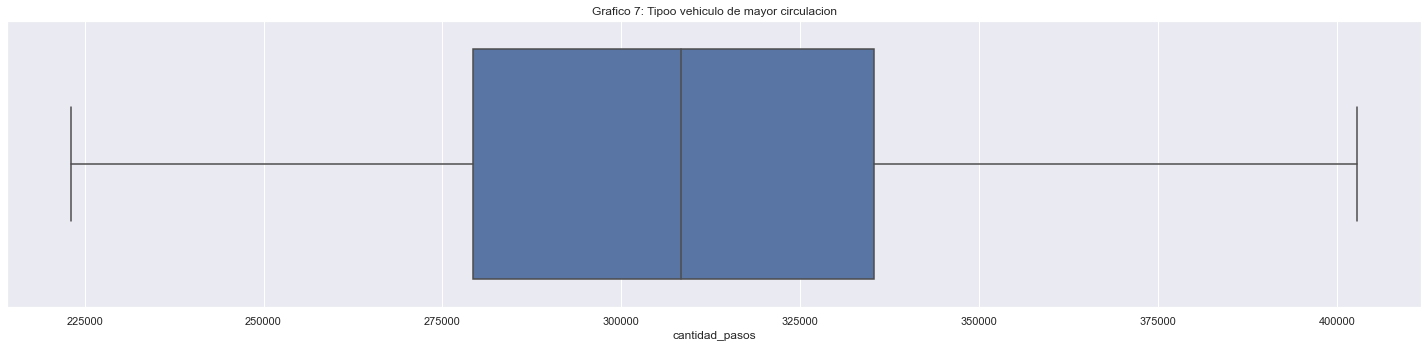

In [39]:
#Grafico 7 Boxplot Deteccion de outliers
from numpy import percentile
sns.set(context='notebook')
plt.figure(figsize=(20, 5))
q25,q75 = percentile(semanal['cantidad_pasos'], 25), percentile(semanal['cantidad_pasos'], 75)
iqr = q75-q25
minimo = q25-(1.5*iqr)
maximo = q75+(1.5*iqr)
print(q25,q75,iqr, minimo, maximo)
sns.boxplot(data=semanal,x='cantidad_pasos')
#plt.xlim([minimo, maximo])
plt.title('Grafico 7: Tipoo vehiculo de mayor circulacion')
plt.tight_layout()
plt.show()

In [40]:
semanal.describe()

,cantidad_pasos
count,155.000000
mean,308468.529032
std,35742.270033
min,223160.000000
25%,279304.500000
50%,308307.000000
75%,335271.000000
max,402792.500000


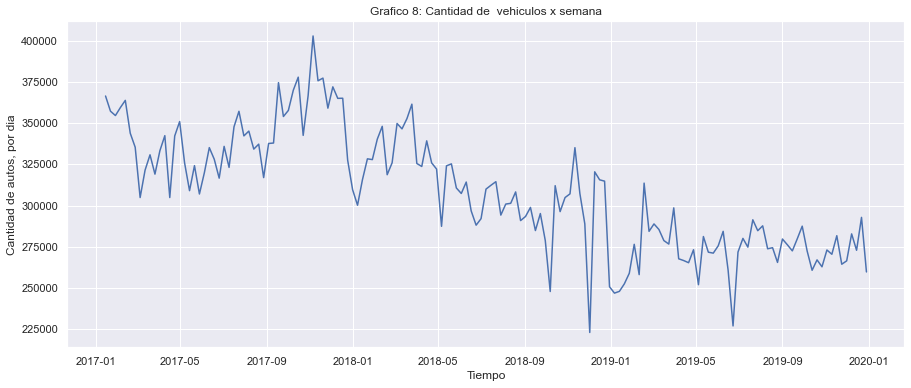

In [41]:
#Gráfico #8 Serie completa-Resemple Semanal
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Grafico 8: Cantidad de  vehiculos x semana')
plt.show()

Del grafico # 8, se puede observar que durante el primer semestre del 2019 esta modalidad de pago tuvo una fuerte caida

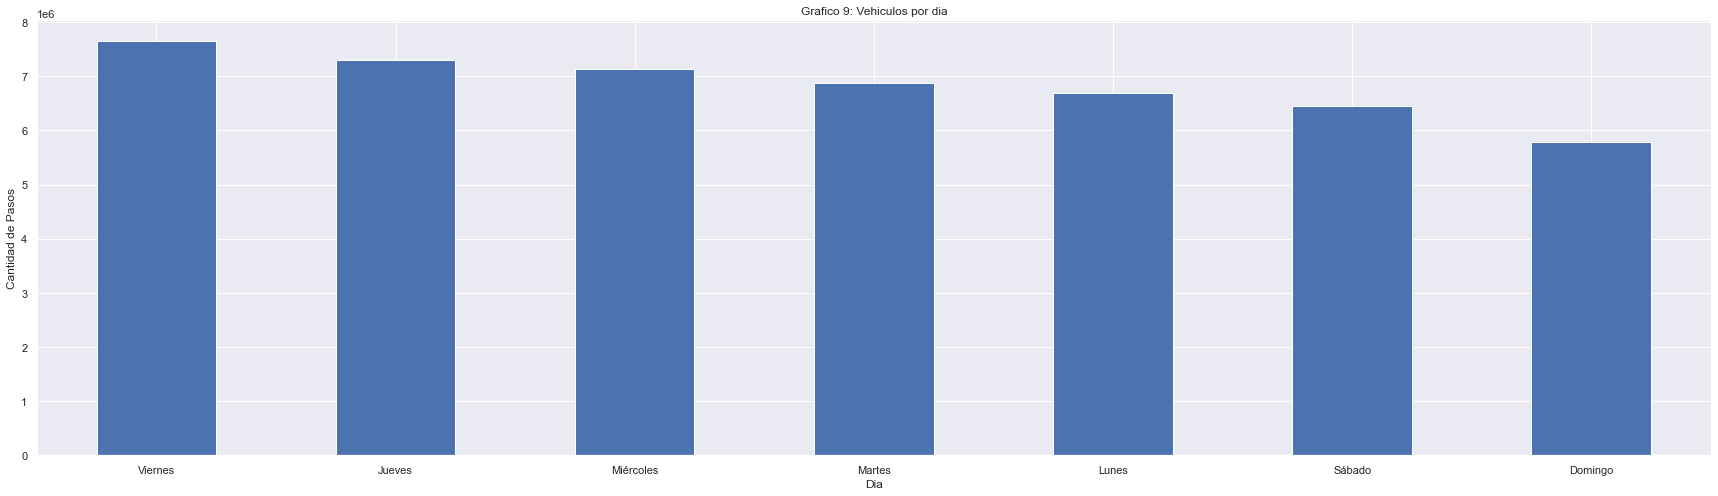

In [42]:
#Gráfico #9
plt.figure(figsize = (30,8))
dtset.groupby(by="dia")["cantidad_pasos"].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel('Dia')
plt.ylabel('Cantidad de Pasos')
plt.title('Grafico 9: Vehiculos por dia')
plt.show()

In [43]:
print(semanal.isna().sum())
semanal = semanal.interpolate()
print(semanal.isna().sum())

cantidad_pasos    0
dtype: int64
cantidad_pasos    0
dtype: int64


In [44]:
ventana = int(365/7)
semanal_promedio_tendencia = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia

fecha
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
2017-02-05   NaN
2017-02-12   NaN
              ..
2019-12-01   NaN
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 155, dtype: float64

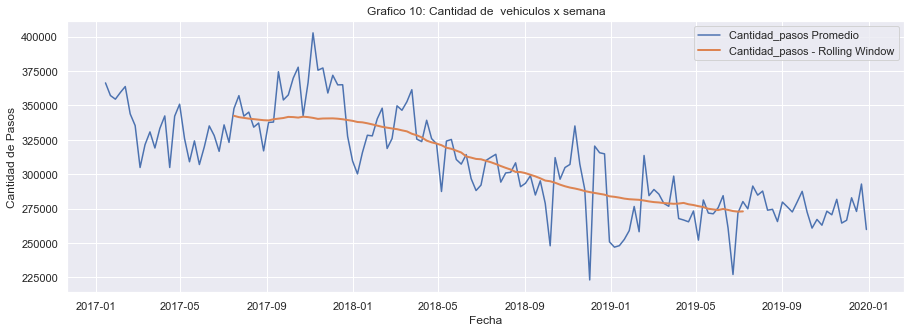

In [45]:
#Gráfico #10
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad_pasos Promedio')
plt.plot(semanal_promedio_tendencia, lw = 2, label = 'Cantidad_pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.title('Grafico 10: Cantidad de  vehiculos x semana')
plt.legend()
plt.show()

## Tendencia Lineal

In [46]:
import datetime

In [47]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
semanal.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-15,366413.0,736344
2017-01-22,357215.0,736351
2017-01-29,354581.0,736358
2017-02-05,359401.0,736365
2017-02-12,363774.0,736372


In [48]:
#Modelo de regresion lineal 
lr = LinearRegression()
lr.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.cantidad_pasos)

LinearRegression()

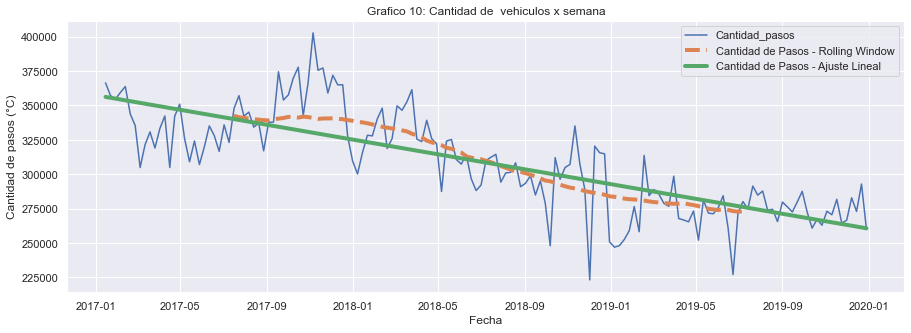

In [49]:
#Grafico #10
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad_pasos')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de Pasos - Rolling Window')
plt.plot(semanal.index, lr.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos (°C)')
plt.title('Grafico 10: Cantidad de  vehiculos x semana')
plt.legend()
plt.show()

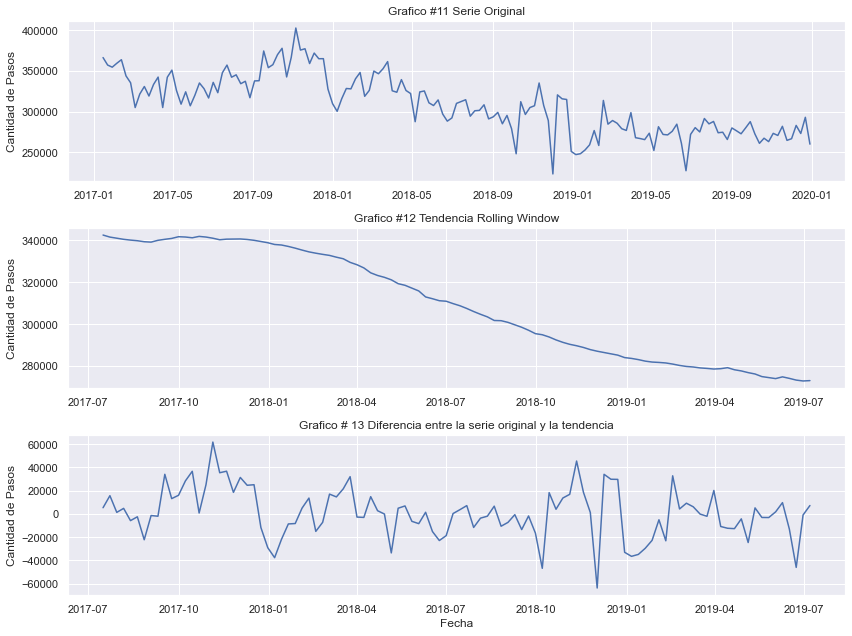

In [50]:
#Grafico #11 #12 #13
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Grafico #11 Serie Original')
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,2)
plt.title('Grafico #12 Tendencia Rolling Window')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,3)
plt.title('Grafico # 13 Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.cantidad_pasos - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')

plt.tight_layout()
plt.show()


In [51]:
#Descomponiendo la serie Semanal
result = seasonal_decompose(semanal.cantidad_pasos, model='additive')
#result.plot()
#pyplot.show()

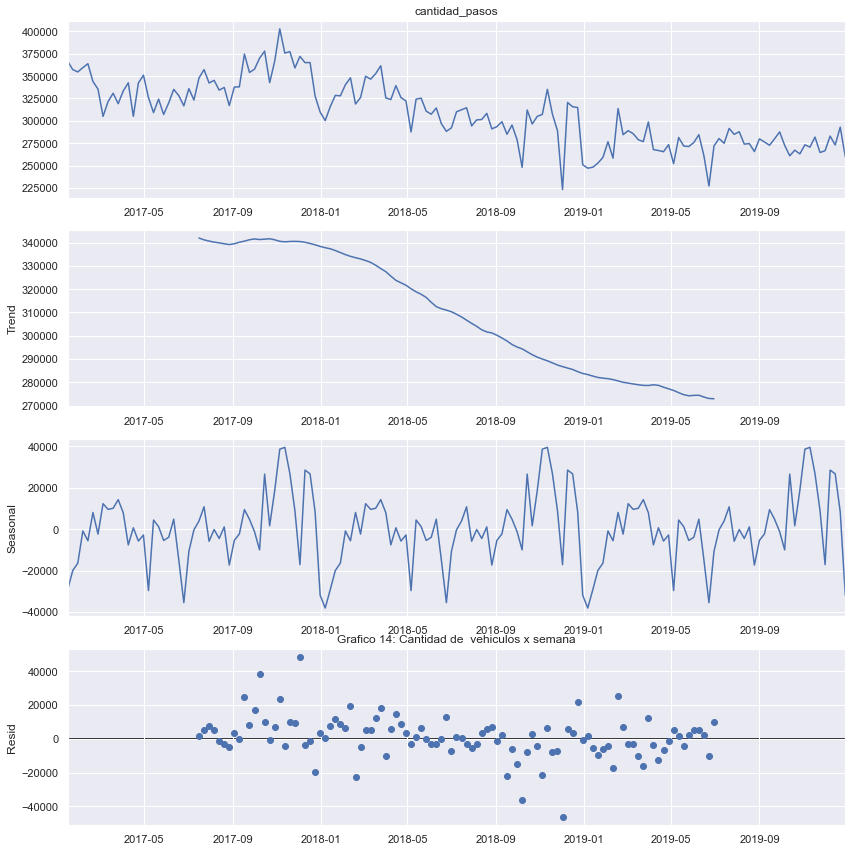

In [52]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.title('Grafico 14: Cantidad de  vehiculos x semana')
plt.show()

Del grafico # 14 se puede observar la serie total, la tendencia la cual como se muestra es decreciente, se puede observar a su vez la estacionalidad la cual es anual y el ruido blanco, el cual no muestra ningun patron.
Es de presumir que cuando se proceda a generar el modelo de prediccion, la tendencia sea decreciente por el tipo de pago que se selecciono 

In [53]:
mensual = dataset.resample('M', on = 'fecha').sum()
mensual.head()

,cantidad_pasos
fecha,
2017-01-31,1565260.0
2017-02-28,1363113.0
2017-03-31,1451214.0
2017-04-30,1429522.0
2017-05-31,1407136.0


In [54]:
ventana_mensual = int(365/30)
mensual_promedio_tendencia = mensual.cantidad_pasos.rolling(window=ventana_mensual, center = True).mean()
mensual_promedio_tendencia

fecha
2017-01-31             NaN
2017-02-28             NaN
2017-03-31             NaN
2017-04-30             NaN
2017-05-31             NaN
2017-06-30             NaN
2017-07-31    1.490658e+06
2017-08-31    1.478692e+06
2017-09-30    1.476690e+06
2017-10-31    1.484158e+06
2017-11-30    1.480820e+06
2017-12-31    1.479771e+06
2018-01-31    1.469322e+06
2018-02-28    1.456189e+06
2018-03-31    1.443061e+06
2018-04-30    1.419294e+06
2018-05-31    1.393480e+06
2018-06-30    1.366377e+06
2018-07-31    1.344183e+06
2018-08-31    1.320962e+06
2018-09-30    1.304628e+06
2018-10-31    1.281185e+06
2018-11-30    1.260723e+06
2018-12-31    1.245313e+06
2019-01-31    1.231400e+06
2019-02-28    1.223326e+06
2019-03-31    1.214100e+06
2019-04-30    1.210756e+06
2019-05-31    1.201595e+06
2019-06-30    1.191555e+06
2019-07-31    1.185742e+06
2019-08-31             NaN
2019-09-30             NaN
2019-10-31             NaN
2019-11-30             NaN
2019-12-31             NaN
Freq: M, Name: cantida

In [55]:
mensual['fecha_numeros']=mensual.index.map(datetime.datetime.toordinal)
mensual.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-31,1565260.0,736360
2017-02-28,1363113.0,736388
2017-03-31,1451214.0,736419
2017-04-30,1429522.0,736449
2017-05-31,1407136.0,736480


In [56]:
lr.fit(mensual.fecha_numeros.values.reshape(-1, 1), mensual.cantidad_pasos)

LinearRegression()

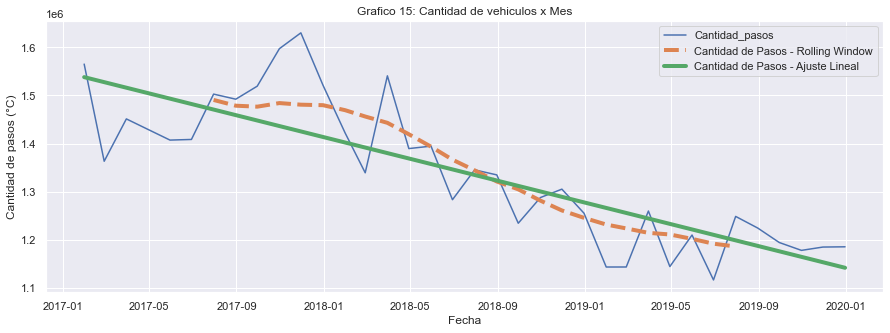

In [57]:
#Grafico # 15
plt.figure(figsize = (15,5))
plt.plot(mensual.index, mensual.cantidad_pasos, label = 'Cantidad_pasos')
plt.plot(mensual_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de Pasos - Rolling Window')
plt.plot(mensual.index, lr.predict(mensual.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos (°C)')
plt.title('Grafico 15: Cantidad de vehiculos x Mes')
plt.legend()
plt.show()

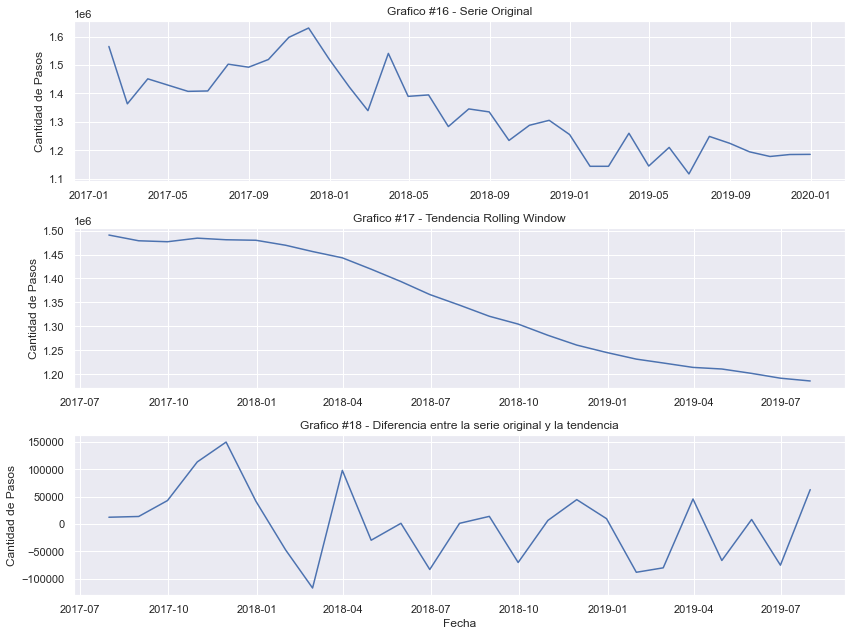

In [58]:
#Grafico #16 #17 #18
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Grafico #16 - Serie Original')
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,2)
plt.title('Grafico #17 - Tendencia Rolling Window')
plt.plot(mensual_promedio_tendencia)
plt.ylabel('Cantidad de Pasos')
          

plt.subplot(3,1,3)
plt.title('Grafico #18 - Diferencia entre la serie original y la tendencia')
plt.plot(mensual.index, mensual.cantidad_pasos - mensual_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')

plt.tight_layout()
plt.show()


In [59]:
#Descomponiendo la serie
result_mensual = seasonal_decompose(mensual.cantidad_pasos, model='additive')

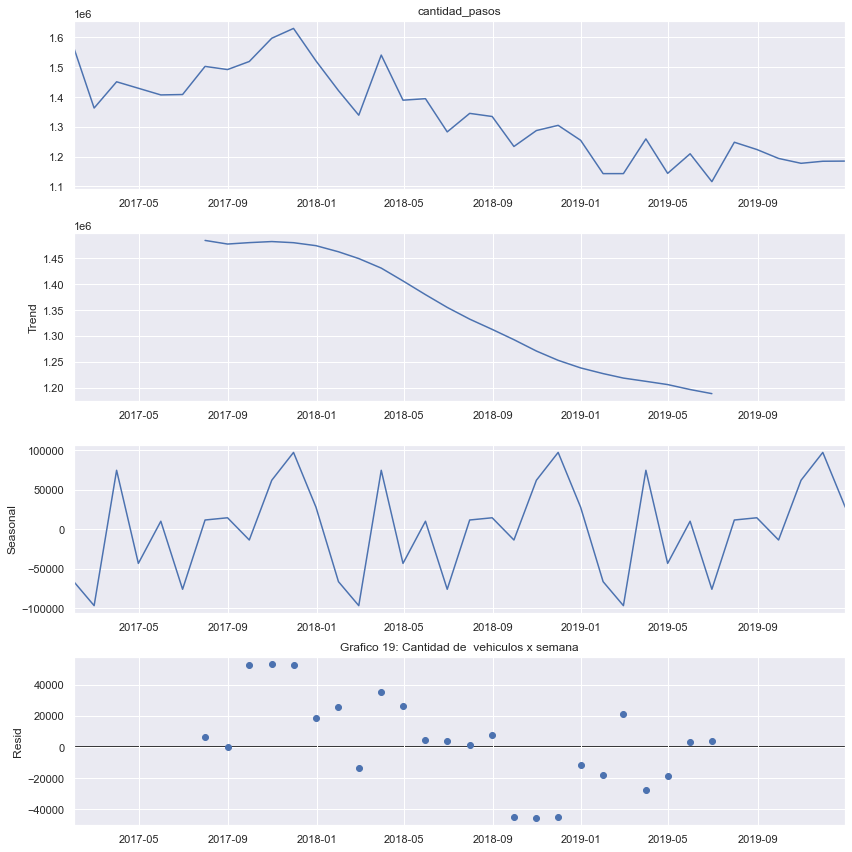

In [60]:
#Grafico #19 - Tendencia / Estacionalidad - Resample Mensual 
matplotlib.rcParams['figure.figsize'] = [12,12]
result_mensual.plot()
plt.title('Grafico 19: Cantidad de  vehiculos x semana')
plt.show()

Del grafico #19, se puede observar mismo resultado que el resample semanal, tendencia decreciente, estacionalidad anual y residuo no presenta ningun patron 

In [61]:
from statsmodels.tsa.stattools import acf
nlagd =  52*3-2
autocorr = acf(semanal.cantidad_pasos, nlags = nlagd)

C:\Users\Elsi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [62]:
autocorr.shape

(155,)

Text(0.5, 0, 'lag')

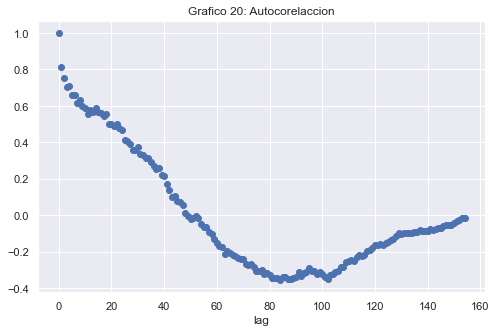

In [63]:
#Grafico# 20 Autocorelaccion
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlagd+1), autocorr)
plt.title('Grafico 20: Autocorelaccion')
plt.xlabel('lag')

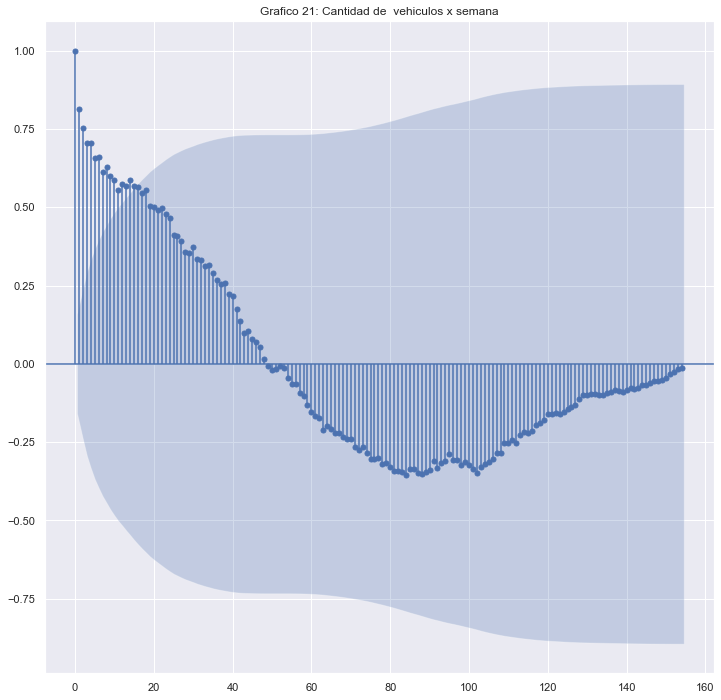

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
#Grafico # 21
plot_acf(semanal.cantidad_pasos, lags = (52*3-2))
plt.title('Grafico 21: Cantidad de  vehiculos x semana')
plt.show()

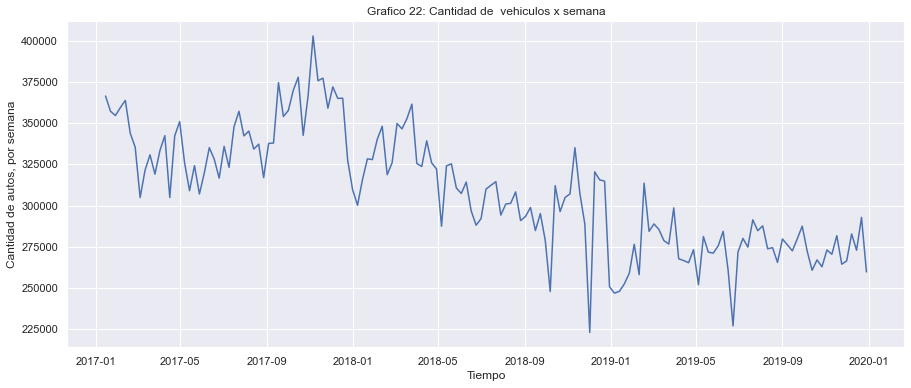

In [65]:
#Grafico # 22
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.title('Grafico 22: Cantidad de  vehiculos x semana')
plt.show()

 ## One-Step Prediction

In [66]:
senial = semanal.cantidad_pasos
senial.head()

fecha
2017-01-15    366413.0
2017-01-22    357215.0
2017-01-29    354581.0
2017-02-05    359401.0
2017-02-12    363774.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [67]:
look_back = 52 # usamos 52 semanas de datos para predecir el valor siguiente*

In [68]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(102, 52) (102,)


In [69]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [70]:
print(X)

[[366413. 357215. 354581. ... 327602. 309692. 300242.]
 [357215. 354581. 359401. ... 309692. 300242. 315780.]
 [354581. 359401. 363774. ... 300242. 315780. 328359.]
 ...
 [320481. 315645. 314832. ... 281790. 264500. 266555.]
 [315645. 314832. 250861. ... 264500. 266555. 282891.]
 [314832. 250861. 246994. ... 266555. 282891. 272960.]]


In [71]:
print(y)

[315780.  328359.  327887.  340275.  348044.  318733.  325966.  349768.
 346506.  352713.  361465.  325545.  323725.  339255.  325904.  322154.
 287470.  324115.  325304.  310709.  307369.  314291.  296834.  288154.
 292119.5 310012.  312335.  314517.  294270.  300955.  301407.  308307.
 290940.  293436.  298932.  284913.  295210.  278806.5 247986.  312089.
 296381.  304897.  307134.  335116.  307352.  288934.  223160.  320481.
 315645.  314832.  250861.  246994.  248077.  252617.  259019.  276568.
 258204.  313644.  284439.  288919.  285547.  278834.  276714.  298638.
 267797.  266745.  265423.  273282.  252104.  281283.  271796.  271232.
 275654.5 284432.  260940.  227123.  271865.  280160.  274852.  291431.
 284822.  287773.  273867.  274513.  265594.  279775.  276271.  272592.
 279927.  287568.  272483.  260840.  267147.  262950.  273129.  270536.
 281790.  264500.  266555.  282891.  272960.  292881. ]


In [72]:
N_train = 52*2+38 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(90, 52) (90,)
(12, 52) (12,)


In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs = 4).fit(X_train,y_train)

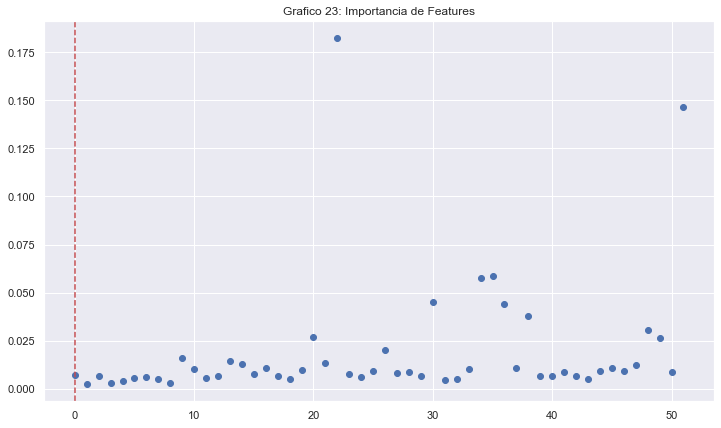

In [74]:
#Grafico #23
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(1)*52:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.title('Grafico 23: Importancia de Features')
plt.show()

In [75]:
X_train.shape

(90, 52)

In [76]:
X_test.shape

(12, 52)

In [77]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

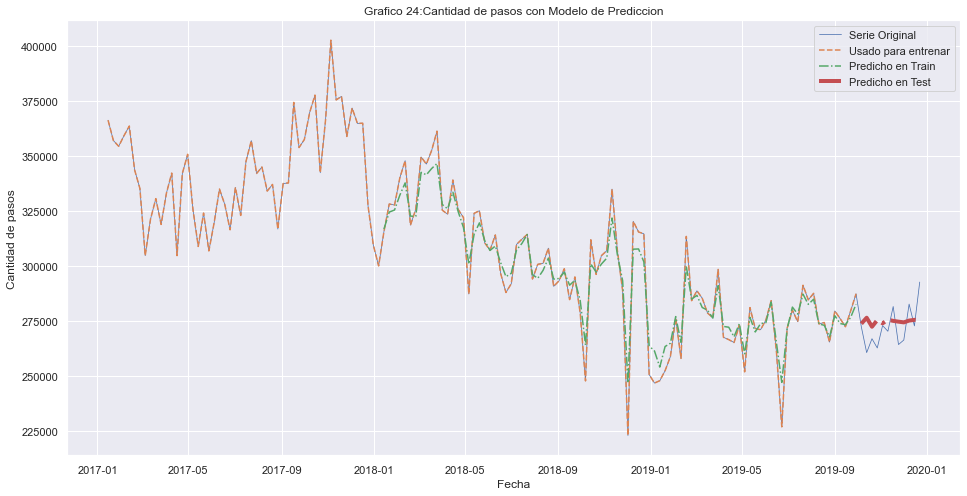

In [78]:
#Grafico #24 - Graficando modelo de prediccion
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('Grafico 24:Cantidad de pasos con Modelo de Prediccion')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

In [79]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 6972.426044236691
Error en Test: 9374.384090948566


In [80]:
#Creando un Modelo Benchmark - Promedio
modelo_bench=semanal['cantidad_pasos'].mean()
print(modelo_bench)

308468.5290322581


In [81]:
#Calculando la Raiz del error cuadratico medio para el modelo Benchmark - Promedio
y_train_bench =np.repeat(modelo_bench, y_train.size)
y_test_bench = np.repeat(modelo_bench, y_test.size)
rmse_train_bench = np.sqrt(mean_squared_error(y_train_bench, y_train))
rmse_test_bench = np.sqrt(mean_squared_error(y_test_bench, y_test))
print(f'Raíz del error cuadrático medio en Train_benchmark: {rmse_train_bench}')
print(f'Raíz del error cuadrático medio en Test_benchmark: {rmse_test_bench}')

Raíz del error cuadrático medio en Train_benchmark: 31746.620870214985
Raíz del error cuadrático medio en Test_benchmark: 37182.38321058222


In [82]:
#Probando otro modelo Benchmark- Copiando valor de fecha anterior
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [83]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

11982.629653655606


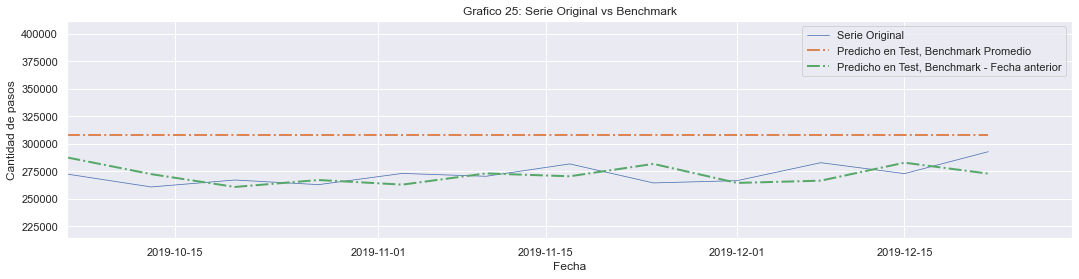

In [84]:
#Grafico #25
plt.figure(figsize=(18,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_bench,'-.', lw = 2, label = 'Predicho en Test, Benchmark Promedio')
plt.plot(senial.index[N_train+look_back: length_total],y_test_pred_benchmark, '-.', lw = 2, label = 'Predicho en Test, Benchmark - Fecha anterior')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Grafico 25: Serie Original vs Benchmark')
plt.legend()
plt.show()

Del grafico #25 se puede observar la serie original con los modelos benchmark Promedio y fecha  anterior, para el cual este ultimo simula bastante bien la serie original 

## Multi-Step Prediction

In [85]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

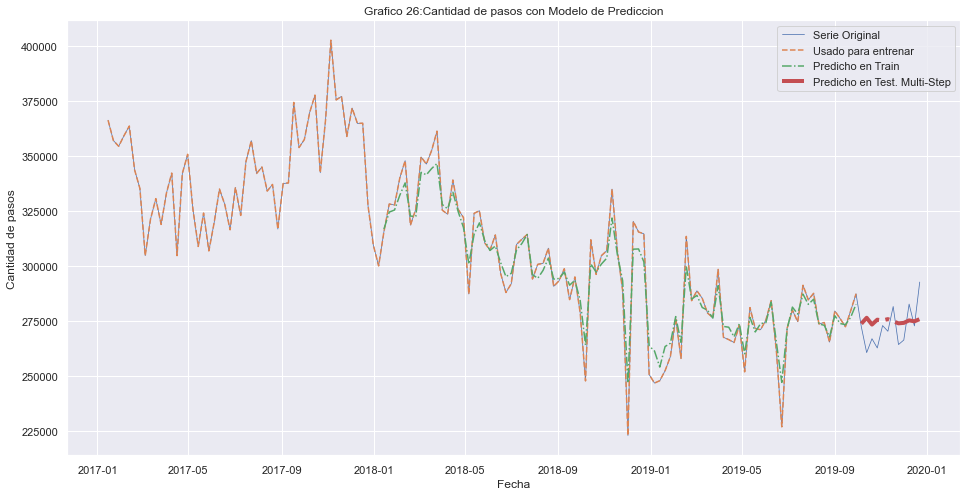

In [86]:
#Grafico 26 Modelo Multi-Step Prediction
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.title('Grafico 26:Cantidad de pasos con Modelo de Prediccion')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

In [87]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 9289.447523883533


## Prophet

In [88]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
import pandas as pd
from fbprophet import Prophet
import pystan

In [89]:
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1.0,2017-01-01
1,Domingo,Provincia,Liviano,9.0,2017-01-01
2,Domingo,Provincia,Liviano,644.0,2017-01-01
3,Domingo,Provincia,Pesado,6.0,2017-01-01
4,Domingo,Provincia,Pesado,1.0,2017-01-01


In [90]:
d_taset=dataset.copy()

In [91]:
d_taset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1.0,2017-01-01
1,Domingo,Provincia,Liviano,9.0,2017-01-01
2,Domingo,Provincia,Liviano,644.0,2017-01-01
3,Domingo,Provincia,Pesado,6.0,2017-01-01
4,Domingo,Provincia,Pesado,1.0,2017-01-01
...,...,...,...,...,...
238874,Jueves,Provincia,Liviano,21862.0,2018-11-29
238875,Viernes,Provincia,Liviano,20970.0,2018-11-30
238876,Lunes,Provincia,Liviano,39980.0,2019-02-11
238877,Miercoles,Provincia,Liviano,40353.5,2019-05-29


In [92]:
#Filtrando el dataset de prueba
aux = d_taset[(d_taset['fecha'] > "2017-01-09") & (d_taset['fecha'] <= "2019-09-28")]
df_analisis = aux.set_index("fecha")
df_analisis.reset_index(inplace = True)
df_analisis [:3]

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos
0,2017-01-09 01:00:00,Lunes,Centro,Pesado,1.0
1,2017-01-09 01:00:00,Lunes,Provincia,Liviano,8.0
2,2017-01-09 01:00:00,Lunes,Provincia,Liviano,510.0


In [93]:
semanal = df_analisis.resample('W', on = 'fecha').sum()
semanal.tail()

,cantidad_pasos
fecha,
2019-09-01,279775.0
2019-09-08,276271.0
2019-09-15,272592.0
2019-09-22,279927.0
2019-09-29,208962.0


In [94]:
#Renombrando columnas del dataset
semanal.cantidad_pasos.index
semanal.reset_index(inplace = True)
semanal = semanal.rename(columns={'fecha': 'ds', 'cantidad_pasos': 'y'})
semanal.head()

,ds,y
0,2017-01-15,365650.0
1,2017-01-22,357215.0
2,2017-01-29,354581.0
3,2017-02-05,359401.0
4,2017-02-12,363774.0


In [95]:
#Entrenando modelo Prophet 
semanal_model = Prophet(seasonality_prior_scale = 80, growth ='linear', yearly_seasonality= "auto", 
                       interval_width = 0.95, n_changepoints = 2, holidays= None, weekly_seasonality  = "auto",
                       changepoints = None, holidays_prior_scale = 10, mcmc_samples = 0, changepoint_prior_scale = 0.1,
                       daily_seasonality = "auto", uncertainty_samples = 100, seasonality_mode = "multiplicative")
semanal_model.fit(semanal)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [96]:
#Predicción del ultimo trimestre 2019
semanal_forecast = semanal_model.make_future_dataframe(periods= 12, freq='W')
semanal_forecast = semanal_model.predict(semanal_forecast)
semanal_forecast [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
149,2019-11-24,276769.851449,239801.380668,307983.979253
150,2019-12-01,276574.333696,243125.204842,312660.239546
151,2019-12-08,283035.768418,249613.748458,311692.219583
152,2019-12-15,284816.094504,245200.938363,316677.561074
153,2019-12-22,274566.014949,230736.296117,304142.631271


<Figure size 1296x432 with 0 Axes>

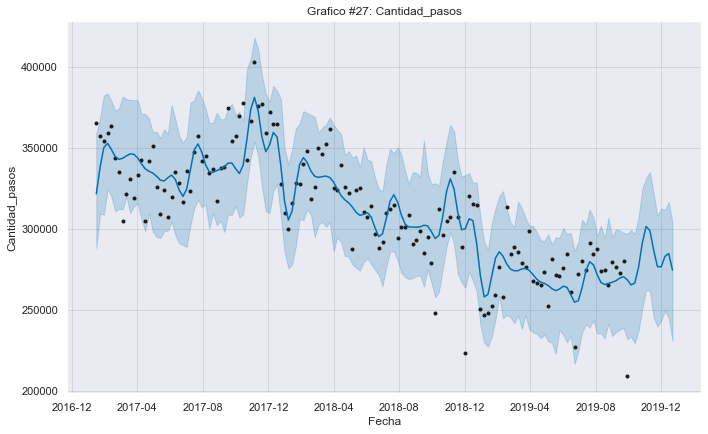

In [97]:
#Grafico #27 Modelo Prophet
plt.figure(figsize=(18, 6))
semanal_model.plot(semanal_forecast, xlabel = 'Fecha', ylabel = 'Cantidad_pasos')
plt.title('Grafico #27: Cantidad_pasos');


In [98]:
metric_df = semanal_forecast.set_index('ds')[['yhat']].join(semanal.set_index('ds').y).reset_index()

In [99]:
type(metric_df)

pandas.core.frame.DataFrame

In [100]:
metric_df.dropna(inplace=True)

In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
metric_df.min()

ds      2017-01-15 00:00:00
yhat          254801.313478
y                  208962.0
dtype: object

In [103]:
MSE_prophet=mean_squared_error(metric_df.y, metric_df.yhat)
print(np.sqrt(MSE_prophet))

17486.34831047216


## Predicción Tráfico 2020- Modalidad de pago Efectivo

In [104]:
#Estimando año 2020
anual_forecast = semanal_model.make_future_dataframe(periods= 62, freq='W')
anual_forecast = semanal_model.predict(anual_forecast)
anual_forecast [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
199,2020-11-08,290685.332005,222747.709655,331062.504666
200,2020-11-15,279996.071408,213187.744873,347304.825469
201,2020-11-22,268974.771682,207253.910842,325935.602435
202,2020-11-29,266937.287234,192283.123123,323881.142360
203,2020-12-06,272750.150640,181609.525644,330945.110785


<Figure size 1296x432 with 0 Axes>

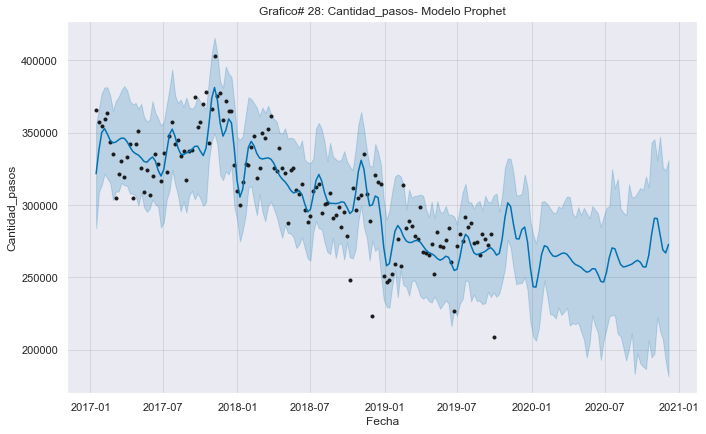

In [105]:
#Grafico #28
plt.figure(figsize=(18, 6))
semanal_model.plot(anual_forecast, xlabel = 'Fecha', ylabel = 'Cantidad_pasos')
plt.title('Grafico# 28: Cantidad_pasos- Modelo Prophet');

In [106]:
metric_df_anual = anual_forecast.set_index('ds')[['yhat']].join(semanal.set_index('ds').y).reset_index()

In [107]:
metric_df_anual.dropna(inplace=True)

In [108]:
MSE_prophet=mean_squared_error(metric_df_anual.y, metric_df_anual.yhat)
print(np.sqrt(MSE_prophet))

17486.34831047216


Del grafico #28 se puede observar la tendencia del periodo 2020 el cual fue predicho mediante el modleo Prophet. La tendencia es negativa. En lo que respecta a la metrica evaluada no se puede observar mejoras 

Se procede a incluir datos del 2016 para determinar si existen mejoras en la metrica seleccionada RMSE 

In [109]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_1 = pd.concat([data_2019, data_2018, data_2017,data_2016])
print(dataset_1)
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_1.estacion=='Illia', dataset_1.forma_pago == 'EFECTIVO')
dataset = dataset_1[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

         periodo       fecha  hora_inicio  hora_fin     dia    estacion  \
0           2019  2019-01-01            0         1  Martes     Alberti   
1           2019  2019-01-01            0         1  Martes     Alberti   
2           2019  2019-01-01            0         1  Martes     Alberti   
3           2019  2019-01-01            0         1  Martes     Alberti   
4           2019  2019-01-01            0         1  Martes  Avellaneda   
...          ...         ...          ...       ...     ...         ...   
1379438     2016  2016-12-31           21        22  Sábado   Sarmiento   
1379439     2016  2016-12-31           22        23  Sábado   Sarmiento   
1379440     2016  2016-12-31           22        23  Sábado   Sarmiento   
1379441     2016  2016-12-31           23         0  Sábado   Sarmiento   
1379442     2016  2016-12-31           23         0  Sábado   Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0           Centro       Liviano  NO

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [110]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.rename(columns = {'fecha':'fecha_original'}, inplace = True) 
dataset.drop(columns=['hora_fin'], inplace = True)

dataset.head()

<ipython-input-110-76ced8f85330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,2019-01-01,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019-01-01,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019-01-01,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019-01-01,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019-01-01,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [111]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,2019-01-01,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019-01-01,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019-01-01,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019-01-01,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019-01-01,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [112]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True, ascending=True)
dataset.reset_index(drop=True, inplace = True)
dataset

<ipython-input-112-bb8804ec6789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.sort_values('fecha', inplace = True, ascending=True)


,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,2016-01-01,Viernes,Centro,Liviano,14,2016-01-01 00:00:00
1,2016-01-01,Viernes,Centro,Pesado,3,2016-01-01 00:00:00
2,2016-01-01,Viernes,Provincia,Liviano,66,2016-01-01 00:00:00
3,2016-01-01,Viernes,Provincia,Pesado,1,2016-01-01 00:00:00
4,2016-01-01,Viernes,Provincia,Pesado,4,2016-01-01 00:00:00
...,...,...,...,...,...,...
346561,2019-12-31,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
346562,2019-12-31,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
346563,2019-12-31,Martes,Centro,Liviano,580,2019-12-31 22:00:00
346564,2019-12-31,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [113]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1461, 1)


,cantidad_pasos
fecha,
2016-01-01,25602
2016-01-02,36136
2016-01-03,37225
2016-01-04,50312
2016-01-05,49907


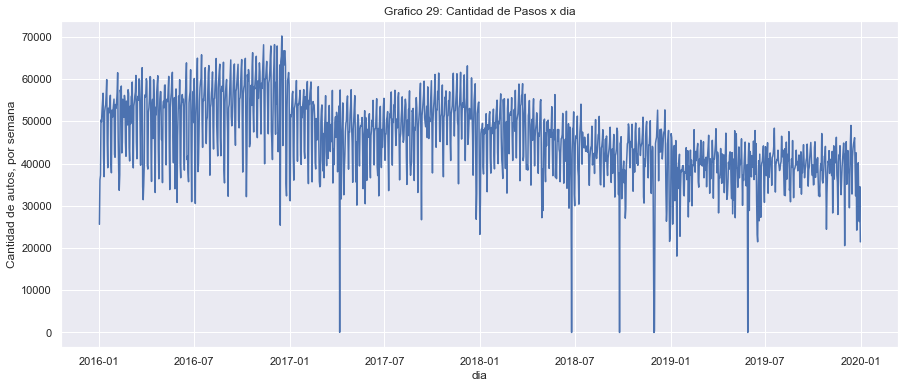

In [114]:
#Grafico #29 Cantidad de Pasos por dia - Periodo 2016-2019
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('dia')
plt.ylabel('Cantidad de autos, por semana')
plt.title('Grafico 29: Cantidad de Pasos x dia')
plt.show()

In [115]:
#Completando datos faltantes 
from datetime import timedelta
import datetime as dt
from datetime import datetime

arrDayOfWeek={0:'Domingo', 1:'Lunes', 2:'Martes', 3:'Miercoles', 4:'Jueves', 5:'Viernes', 6:'Sabado'}
def datetime_range(start=None, end=None):
    while start < end:
        ## existe ese dia?
        temp = dataset[(dataset.fecha == start)]
        if temp.empty:
            # No existe este dia, lo agregamos en null
            dds = int(start.strftime("%w"))
            dia_de_la_semana = arrDayOfWeek[dds]
            
            dia_anterior = start - timedelta(days=1)
            s_dia_anterior = dia_anterior.strftime("%Y-%m-%d")
            cantidad_anterior = dataset.cantidad_pasos[(dataset.fecha_original == s_dia_anterior)].sum()
            
            dia_siguiente  = start + timedelta(days=1)
            s_dia_siguiente = dia_siguiente.strftime("%Y-%m-%d")
            cantidad_siguiente = dataset.cantidad_pasos[(dataset.fecha_original == s_dia_siguiente)].sum()
            
            promedio = (cantidad_anterior + cantidad_siguiente) / 2
            fecha_original = start.strftime("%Y-%m-%d")
            
            ## Calcular directamente el promedio de los dias adyacentes
            dataset.loc[dataset.shape[0]] = [fecha_original, dia_de_la_semana, 'Provincia','Liviano', promedio, start] 
            print("Añadido el dia: ", start, promedio)
            
        start = start + timedelta(days=1)
        
datetime_range(start=datetime.strptime('2016-01-01', "%Y-%m-%d"), end=datetime.strptime('2019-12-31', "%Y-%m-%d"))

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Añadido el dia:  2016-10-14 00:00:00 53106.5
Añadido el dia:  2017-04-06 00:00:00 55537.0
Añadido el dia:  2017-11-04 00:00:00 48845.5
Añadido el dia:  2018-06-25 00:00:00 38312.5
Añadido el dia:  2018-09-25 00:00:00 41299.5
Añadido el dia:  2018-11-10 00:00:00 40806.0
Añadido el dia:  2018-11-29 00:00:00 21862.0
Añadido el dia:  2018-11-30 00:00:00 20970.0
Añadido el dia:  2019-02-11 00:00:00 39980.0
Añadido el dia:  2019-05-29 00:00:00 40353.5
Añadido el dia:  2019-12-24 00:00:00 33440.0


In [116]:
#Resampleamos nuestros datos para agrupar por semana, y asi tal vez lograr una visualización mas amigable
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(210, 1)


,cantidad_pasos
fecha,
2016-01-03,98963.0
2016-01-10,342201.0
2016-01-17,359649.0
2016-01-24,346217.0
2016-01-31,348221.0


In [117]:
data_20=dataset.copy()

In [118]:
#Descartando semanas incompletas - Filtrando el dataset de prueba
aux = dataset[(dataset['fecha'] >= "2016-01-04") & (dataset['fecha'] <= "2019-09-28")]
df_analisis = aux.set_index("fecha")
df_analisis.reset_index(inplace = True)
df_analisis [:3]

,fecha,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos
0,2016-01-04,2016-01-04,Lunes,Centro,Pesado,3.0
1,2016-01-04,2016-01-04,Lunes,Centro,Pesado,9.0
2,2016-01-04,2016-01-04,Lunes,Centro,Pesado,10.0


In [119]:
semanal = df_analisis.resample('W', on = 'fecha').sum()
semanal.tail()

,cantidad_pasos
fecha,
2019-09-01,279775.0
2019-09-08,276271.0
2019-09-15,272592.0
2019-09-22,279927.0
2019-09-29,208962.0


In [120]:
#Renombrando columnas
semanal.cantidad_pasos.index
semanal.reset_index(inplace = True)
semanal = semanal.rename(columns={'fecha': 'ds', 'cantidad_pasos': 'y'})
semanal.head()

,ds,y
0,2016-01-10,342201.0
1,2016-01-17,359649.0
2,2016-01-24,346217.0
3,2016-01-31,348221.0
4,2016-02-07,364271.0


In [121]:
#Entrenando Moelo Prophet
semanal_model = Prophet(seasonality_prior_scale = 80, growth ='linear', yearly_seasonality= "auto", 
                       interval_width = 0.95, n_changepoints = 2, holidays= None, weekly_seasonality  = "auto",
                       changepoints = None, holidays_prior_scale = 10, mcmc_samples = 0, changepoint_prior_scale = 0.1,
                       daily_seasonality = "auto", uncertainty_samples = 100, seasonality_mode = "multiplicative")
semanal_model.fit(semanal)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [122]:
#Predicción de periodo 2020 con datos 2016-2019
anual_forecast = semanal_model.make_future_dataframe(periods= 64, freq='W')
anual_forecast = semanal_model.predict(anual_forecast)
anual_forecast [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
254,2020-11-22,247983.293419,203062.611626,290389.944100
255,2020-11-29,243713.228581,196037.704489,286361.516442
256,2020-12-06,244596.817451,197990.598365,300218.962647
257,2020-12-13,246030.419693,197309.375238,284648.574847
258,2020-12-20,241783.627379,195800.420084,289629.214097


<Figure size 1296x432 with 0 Axes>

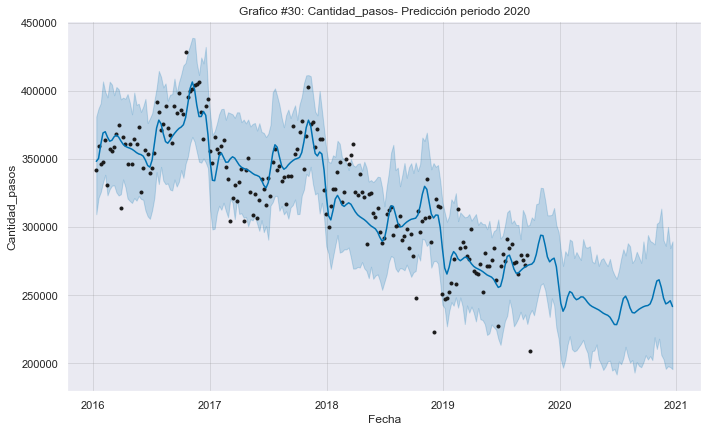

In [123]:
#Grafico #30 Modelo Prophet
plt.figure(figsize=(18, 6))
semanal_model.plot(anual_forecast, xlabel = 'Fecha', ylabel = 'Cantidad_pasos')
plt.title('Grafico #30: Cantidad_pasos- Predicción periodo 2020');


In [124]:
metric_df_anual = anual_forecast.set_index('ds')[['yhat']].join(semanal.set_index('ds').y).reset_index()
metric_df_anual.dropna(inplace=True)

In [125]:
#Calculando Metrica RMSE Datos 2016-2019
MSE_prophet=mean_squared_error(metric_df_anual.y, metric_df_anual.yhat)
print(np.sqrt(MSE_prophet))

18761.65071145959


Se puede observar conforme el resultado del grafico #30 y el valor de RMSE que para Prophet, al incluir mayor cantidad de datos, no se obtiene mejoras, al contrario el valor de error aumenta 

## Para Pensar e Investigar 

In [126]:
dataset_1.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [127]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_1['fecha2'] = pd.to_datetime(dataset_1.fecha) + pd.to_timedelta(dataset_1.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_1.rename(columns = {'fecha':'fecha_original'}, inplace = True) 
dataset_1.drop(columns=['hora_fin'], inplace = True)

dataset_1.head()

,periodo,fecha_original,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,2019,2019-01-01,0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,2019,2019-01-01,0,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,2019,2019-01-01,0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,2019,2019-01-01,0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,2019,2019-01-01,0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00


In [128]:
#Corregimos el nombre de fecha2 a fecha
dataset_1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_1.head()

,periodo,fecha_original,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2019,2019-01-01,0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,2019,2019-01-01,0,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,2019,2019-01-01,0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,2019,2019-01-01,0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,2019,2019-01-01,0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00


In [129]:
#Reordenamos el dataset por fecha
dataset_1.sort_values('fecha', inplace = True, ascending=True)
dataset_1.reset_index(drop=True, inplace = True)
dataset_1

,periodo,fecha_original,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2016,2016-01-01,23,Viernes,Illia,Provincia,Pesado,EFECTIVO,1,2016-01-01 00:00:00
1,2016,2016-01-01,23,Viernes,Illia,Centro,Pesado,EXENTO,4,2016-01-01 00:00:00
2,2016,2016-01-01,23,Viernes,Illia,Centro,Liviano,AUPASS,195,2016-01-01 00:00:00
3,2016,2016-01-01,23,Viernes,Illia,Centro,Liviano,INFRACCION,3,2016-01-01 00:00:00
4,2016,2016-01-01,23,Viernes,Illia,Centro,Liviano,TARJETA DISCAPACIDAD,7,2016-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
4940144,2019,2019-12-31,22,Martes,Illia,Centro,Liviano,TELEPASE,122,2019-12-31 23:00:00
4940145,2019,2019-12-31,22,Martes,Illia,Provincia,Liviano,EXENTO,3,2019-12-31 23:00:00
4940146,2019,2019-12-31,22,Martes,Illia,Provincia,Liviano,INFRACCION,2,2019-12-31 23:00:00
4940147,2019,2019-12-31,22,Martes,Alberti,Provincia,Pesado,EFECTIVO,1,2019-12-31 23:00:00


In [130]:
print(dataset_1['forma_pago'].unique())

['EFECTIVO' 'EXENTO' 'AUPASS' 'INFRACCION' 'TARJETA DISCAPACIDAD'
 'NO COBRADO' 'MONEDERO' 'TELEPASE' 'Otros' 'T. DISCAPACIDAD']


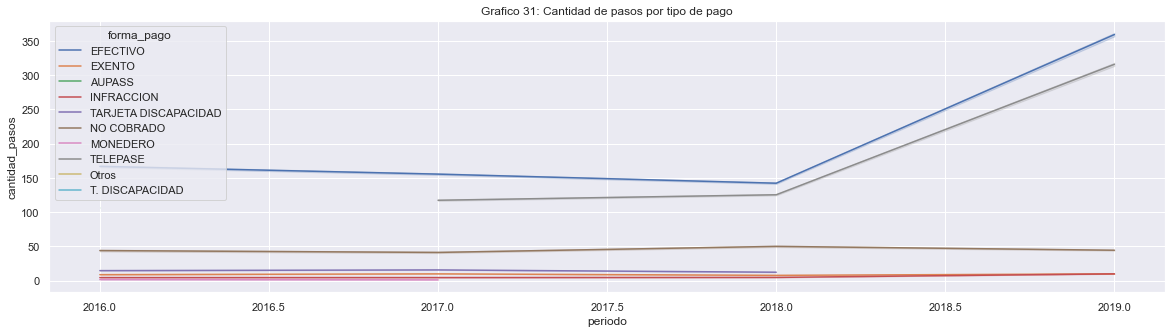

In [131]:
#Grafico #31 Cantidad de pasos por tipo de pago
plt.figure(figsize=(20,5))
sns.lineplot(data=dataset_1, y="cantidad_pasos", x="periodo", hue="forma_pago")
plt.title('Grafico 31: Cantidad de pasos por tipo de pago')
plt.show()

Del grafico 31, se puede observar que la forma de pago Telepase viene incrementando 

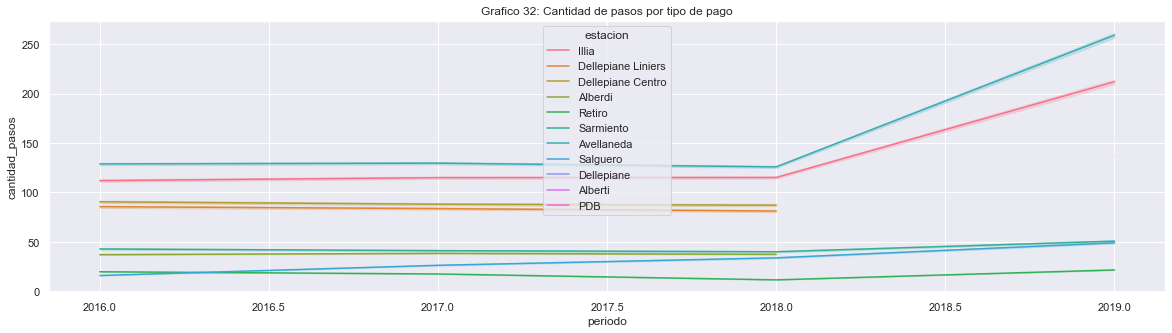

In [132]:
#Grafico #32 Cantidad de pasos por estacion de peaje
plt.figure(figsize=(20,5))
sns.lineplot(data=dataset_1, y="cantidad_pasos", x="periodo", hue="estacion")
plt.title('Grafico 32: Cantidad de pasos por tipo de pago')
plt.show()

In [133]:
estacion_diaria = dataset_1.groupby(by="estacion")["cantidad_pasos"].count().sort_values(ascending=False)
estacion_diaria

estacion
Avellaneda            1364819
Illia                 1055462
Dellepiane Centro      535180
Dellepiane Liniers     529978
Alberdi                455883
Retiro                 444066
Dellepiane             187600
Alberti                132279
Sarmiento               98423
Salguero                95495
PDB                     40964
Name: cantidad_pasos, dtype: int64

Del grafico 32, se puede observar que la estacion por la que circulan mayor cantidad de autos es por la estacion Avellaneda, seguida la estacion Illia

# Conclusiones 
Se procedio en la primera sección a explorar los datos, donde se determino los días y los horarios de mayor tráfico, los cuales son los días viernes a las 18 horas, respectivamente. 
Posterior a concatenar los datos para generar una sola serie y poder realizar los diferentes resamples, diario, semanal, mensual. 
Seguidamente se procedio a completar los datos faltantes de algunas fechas que no contaban con información luego se procedio a determinar la estacionalidad, tendencia y ruido de la serie. Donde se pudo observar que la serie muestra una estacionalidad decreciente para la forma de pago analizada, además se determino que los datos poseen una estacionalidad anual y que el ruido no presenta ninguna tendencia.

Luego se trabajo en el modelo de machine learning, se entreno un Random Forest Regressor y Prophet, donde los datos seleccionados como look back fueron 26 semanas para predeccir el último trimestre del 2019 donde los valores de RMSE Obetenidos son 

One Step Prediction: 10019.18
Multi Step Prediction: 9714.56
Modelo Benchmark Promedio: 37182.38
Modelo Benchmarck -Copiando fecha anterior: 11982.63
Prophet: 17486.34

Al comparar los modelos entrenando, se puede observar que se obtuvo mejores resultados con Ramdom Forest Regressor para el cual se ajusto el hiperparametro numero de estimadores, el cual mejoro el valor de RMSE en la medida que se aumentaba el estimador. 

Finalmente se entreno nuevamente el modelo Prophet para estimar el período 2020, donde se obtuvo como valor de RMSE 17486.34, se incluyo los datos del período 2016 para intentar mejorar la métrica RMSE y predeccir el período 2020, el cual no mejoro el valor de error 18761.65

En la sección de pensar e investigar, es importante incluir los demás datos del período 2020 para poder entrenar los modelos one step prediction y multi step prediction y comparar con el modelo Prophet, a su vez es interesante observar las graficas por tipo de pago y estacion, donde se observa la tendencia de cada uno de los tipos de pago, y se pueda observar que el tipo de pago telepase aumenta, ya que conforme información de la web a partir del 2020 será una forma de pago obligatoria 
